<a href="https://colab.research.google.com/github/nehapraveen28/Face_Emotion_Recognition_Machine_Learning/blob/main/mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch


In [8]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [10]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
data.dropna(inplace=True)


In [12]:
scaler = StandardScaler()
data[['Age', 'Annual_Income_(k$)', 'Spending_Score']] = scaler.fit_transform(
    data[['Age', 'Annual_Income_(k$)', 'Spending_Score']]
)

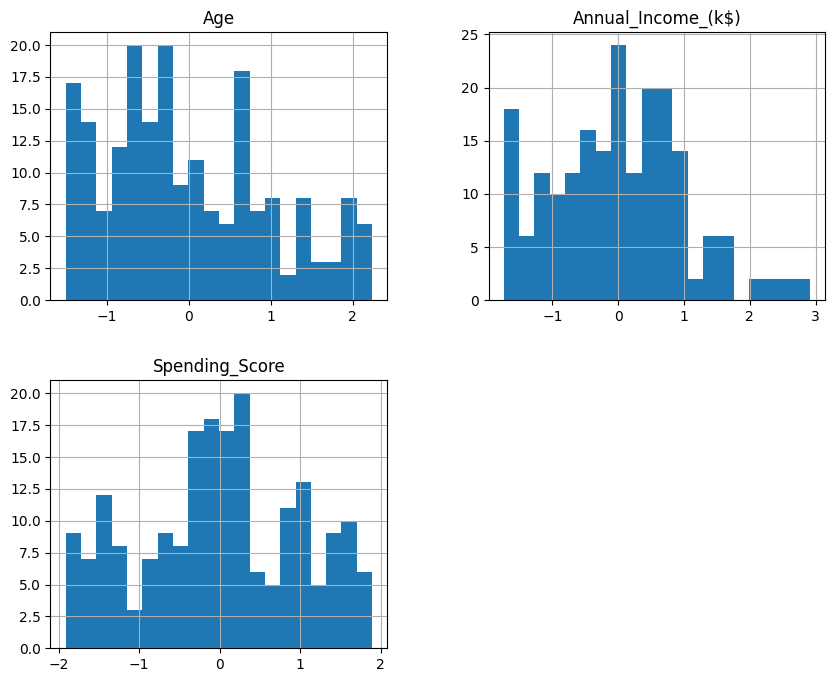

In [13]:
data[['Age', 'Annual_Income_(k$)', 'Spending_Score']].hist(bins=20, figsize=(10, 8))
plt.show()

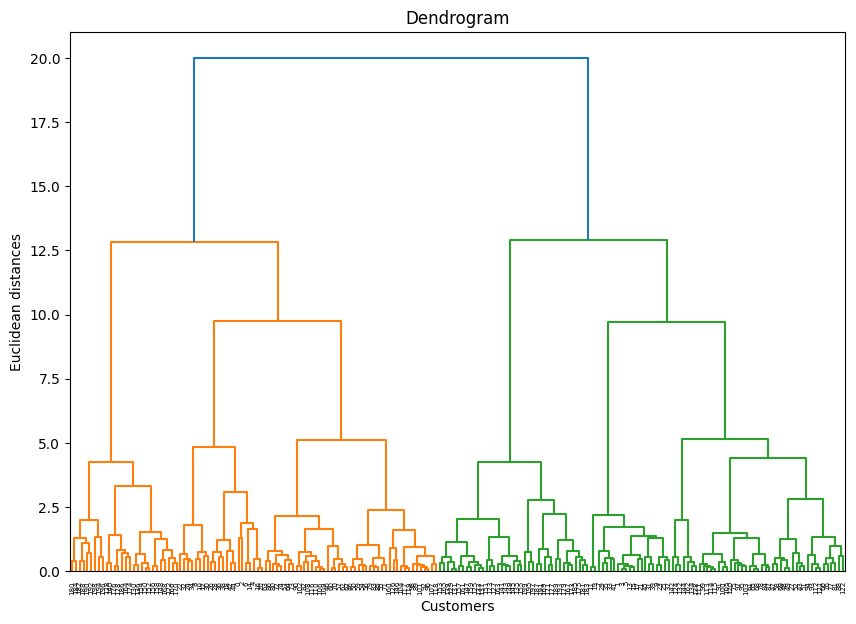

In [14]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data[['Age', 'Annual_Income_(k$)', 'Spending_Score']], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [16]:
cluster_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
data['Cluster'] = cluster_model.fit_predict(data[['Age', 'Annual_Income_(k$)', 'Spending_Score']])


In [17]:
cluster_summary = data.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'std'],
    'Annual_Income_(k$)': ['mean', 'median', 'std'],
    'Spending_Score': ['mean', 'median', 'std']
})
print(cluster_summary)



              Age                     Annual_Income_(k$)                      \
             mean    median       std               mean    median       std   
Cluster                                                                        
0       -0.881969 -1.029852  0.505453          -0.503698 -0.479408  0.699581   
1        1.259505  1.087265  0.600911          -0.201195 -0.250391  0.375363   
2       -0.441917 -0.491602  0.267593           0.991583  0.703844  0.622638   
3        0.361909  0.333715  0.598323           1.172783  1.009200  0.645659   
4        0.392433  0.477248  0.918631          -1.327810 -1.376390  0.291864   

        Spending_Score                      
                  mean    median       std  
Cluster                                     
0             0.255752  0.186343  0.800820  
1            -0.071604 -0.085407  0.266681  
2             1.239503  1.273347  0.363544  
3            -1.301354 -1.327697  0.348363  
4            -1.161823 -1.327697  0.502640  

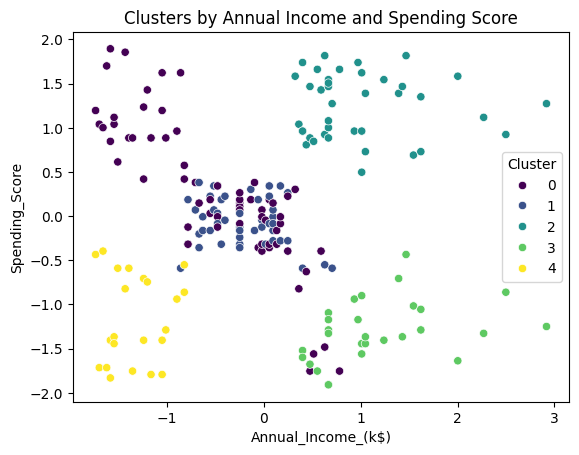

In [18]:
sns.scatterplot(data=data, x='Annual_Income_(k$)', y='Spending_Score', hue='Cluster', palette='viridis')
plt.title('Clusters by Annual Income and Spending Score')
plt.show()
